## CIIC5018 / ICOM5018
## Network Security and Cryptography
## Project 4: GF(2^8) operations for AES
### Francis Jose Patron Fidalgo (802180833)
### sec: 060
### sep/18/2022

In [85]:
import matplotlib.pyplot as plt

## Addition of two numbers

In [86]:
def add(a: int, b: int) -> int:
    return a ^ b 

## Multiplication of two numbers

In [87]:
def multiplication(a: int, b: int) -> int:
    modulo = 0b100011011    # x^8+x^4+x^3+x+1       
    prod= 0
    for i in range(8):
        prod = prod << 1 
        if prod & 0b100000000:
            prod = prod ^ modulo
        if b & 0b010000000:
            prod = prod ^ a
        b = b << 1
    return prod

## Inverse of a number

In [88]:
def inverse(x: int) -> int: # x^254 = 1/x
    p=multiplication(x,x)   # p = x^2
    x=multiplication(p,p)   # x = x^4
    p=multiplication(p,x)   # p = x^(2+4)
    x=multiplication(x,x)   # x = x^8
    p=multiplication(p,x)   # p = x^(2+4+8)
    x=multiplication(x,x)   # x = x^16
    p=multiplication(p,x)   # p = x^(2+4+8+16)
    x=multiplication(x,x)   # x = x^32
    p=multiplication(p,x)   # p = x^(2+4+8+16+32)
    x=multiplication(x,x)   # x = x^64
    p=multiplication(p,x)   # p = x^(2+4+8+16+32+64)
    x=multiplication(x,x)   # x = x^128
    p=multiplication(p,x)   # p = x^(2+4+8+16+32+64+128)
    return p

## Generation of S-Box and InvS-Box

In [89]:
def plot_sbox(sbox: list) -> None:
    plt.figure(figsize = (6, 1))
    labels = [hex(i)[2:].upper() for i in range(16)]
    color = [['gray']*16]*16
    plt.axis('off')
    plt.table(sbox, rowLabels=labels, colLabels=labels, cellColours=color, colWidths= [0.05]*16, loc=(0,0))

In [90]:
def transform_sbox(byte: hex) -> str:
    c = 0x63
    new_num = 0x00
    for i in range(8):
        new_num = new_num | (((byte >> i) & 0x01) 
            ^ ((byte >> ((i + 4) % 8 )) & 0x01) 
            ^ ((byte >> ((i + 5) % 8 )) & 0x01) 
            ^ ((byte >> ((i + 6) % 8 )) & 0x01)
            ^ ((byte >> ((i + 7) % 8 )) & 0x01)
            ^ ((c >> i) & 0x01)) << i
    return new_num

In [91]:
def transform_isbox(byte: hex) -> str:
    c = 0x05
    new_num = 0x00
    for i in range(8):
        new_num = new_num | (((byte >> ((i + 2) % 8 )) & 0x01) 
            ^ ((byte >> ((i + 5) % 8 )) & 0x01) 
            ^ ((byte >> ((i + 7) % 8 )) & 0x01)
            ^ ((c >> i) & 0x01)) << i
    return new_num

In [92]:
def sbox():
    sbox = []
    # Initialize the S-box with the byte values in ascending sequence row by row
    for i in range(16):
        row = []
        for j in range(16):
            row.append(int(hex(i)+hex(j)[2:], 16))
        sbox.append(row)
    # Map each byte in the S-box to its multiplicative inverse in the finite field
    # GF(^8); the value {00} is mapped to itself.
    for row in sbox:
        for i in range(len(row)):
            row[i] = inverse(row[i])
            # Apply the transformation to each bit of each byte in the S-box
            row[i] = hex(transform_sbox(row[i]))[2:].upper()
    return sbox

In [93]:
def isbox():
    sbox = []
    # Initialize the S-box with the byte values in ascending sequence row by row
    for i in range(16):
        row = []
        for j in range(16):
            row.append(int(hex(i)+hex(j)[2:], 16))
        sbox.append(row)
    for row in sbox:
        for i in range(len(row)):
            # Apply the transformation to each bit of each byte in the iS-box
            row[i] = transform_isbox(row[i])
            # Map each byte in the S-box to its multiplicative inverse in the finite field
            # GF(^8); the value {00} is mapped to itself.
            row[i] = hex(inverse(row[i]))[2:].upper()
    return sbox

# Tests

1) Addition: Adding every number and itself shall be 0

In [94]:
res = add(10, 10)
print(f'10 + 10 = {res}')

10 + 10 = 0


2) Multiplication: Multiplying every number and its inverse shall be 1

In [95]:
inv10 = inverse(10)
res = multiplication(10, inv10)
print(f'10 times 10 = {res}')

10 times 10 = 1


3) Inverse: The inverse’s inverse of every non-zero number shall be itself

In [96]:
num = 100
inv_num = inverse(num)
inv_inv_num = inverse(inv_num)
print(f'initial number: {num}')
print(f'inverse: {inv_num}')
print(f'inverse of inverse: {inv_inv_num}')
if num == inv_inv_num:
    print(f'The inverse of inverse of the number matches the original number')

initial number: 100
inverse: 73
inverse of inverse: 100
The inverse of inverse of the number matches the original number


4) Sbox

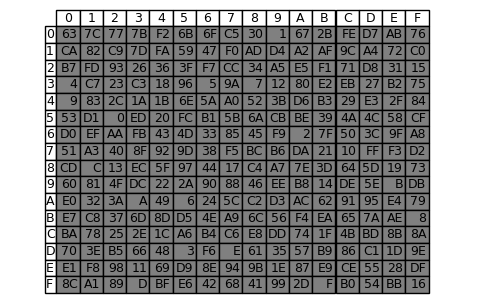

In [97]:
plot_sbox(sbox())

5) Inv Sbox

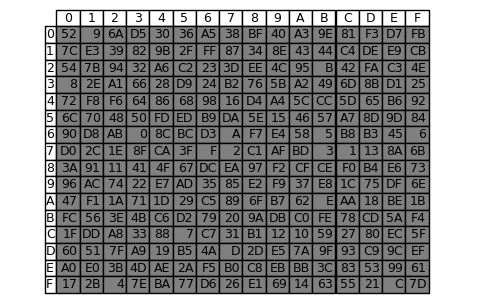

In [98]:
plot_sbox(isbox())